In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.model_selection import train_test_split

In [14]:
df = pd.read_csv('mexico_covid19.csv')
df

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,7094887,2020-06-03,1e019c,32,32,1,0,32,Zacatecas,ZS,...,2,2,2,2,2,1,99,MÃ©xico,99,97
263003,7053721,2020-06-03,1e2b05,12,12,1,0,12,Guerrero,GR,...,2,2,1,2,2,99,99,MÃ©xico,99,2
263004,7055429,2020-06-03,1e473f,20,20,1,0,20,Oaxaca,OC,...,2,2,2,1,2,99,99,MÃ©xico,99,2
263005,7043768,2020-06-03,1e6da1,13,13,1,0,13,Hidalgo,HG,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [15]:
df.columns

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [16]:
df.isnull().sum()

id                     0
FECHA_ARCHIVO          0
ID_REGISTRO            0
ENTIDAD_UM             0
ENTIDAD_RES            0
RESULTADO              0
DELAY                  0
ENTIDAD_REGISTRO       0
ENTIDAD                0
ABR_ENT                0
FECHA_ACTUALIZACION    0
ORIGEN                 0
SECTOR                 0
SEXO                   0
ENTIDAD_NAC            0
MUNICIPIO_RES          6
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0


In [17]:
df = df.dropna()
df

,id,FECHA_ARCHIVO,ID_REGISTRO,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ENTIDAD,ABR_ENT,...,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,9269,2020-04-12,00011f,25,25,2,0,25,Sinaloa,SL,...,2,2,1,2,2,2,99,MÃ©xico,97,97
1,33333,2020-04-12,00014e,14,14,2,0,14,Jalisco,JC,...,2,2,1,2,1,99,99,MÃ©xico,97,2
2,35483,2020-04-12,000153,8,8,1,0,8,Chihuahua,CH,...,2,2,2,2,2,99,99,MÃ©xico,97,2
3,7062,2020-04-12,0001b6,9,15,1,0,9,Ciudad de Mexico,DF,...,2,2,1,2,2,99,99,MÃ©xico,97,97
4,23745,2020-04-12,0001c1,9,9,2,0,9,Ciudad de Mexico,DF,...,2,2,2,2,2,99,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263002,7094887,2020-06-03,1e019c,32,32,1,0,32,Zacatecas,ZS,...,2,2,2,2,2,1,99,MÃ©xico,99,97
263003,7053721,2020-06-03,1e2b05,12,12,1,0,12,Guerrero,GR,...,2,2,1,2,2,99,99,MÃ©xico,99,2
263004,7055429,2020-06-03,1e473f,20,20,1,0,20,Oaxaca,OC,...,2,2,2,1,2,99,99,MÃ©xico,99,2
263005,7043768,2020-06-03,1e6da1,13,13,1,0,13,Hidalgo,HG,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [18]:
excluded = ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO','FECHA_SINTOMAS',
     'ABR_ENT', 'ENTIDAD', 'MIGRANTE', 'NACIONALIDAD', 'ORIGEN', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
     'INTUBADO', 'UCI', 'DIABETES', 'HIPERTENSION', 'NEUMONIA', 'ASMA', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
           'EMBARAZO', 'OTRO_CASO', 'CARDIOVASCULAR', 'OTRA_COM','EPOC', 'DELAY', 'ENTIDAD_UM', 'MUNICIPIO_RES', 'TIPO_PACIENTE', 'ENTIDAD_NAC',
           'ENTIDAD_RES']

df = df.drop(excluded, axis = 1)

In [19]:
df.columns

Index(['RESULTADO', 'ENTIDAD_REGISTRO', 'SECTOR', 'SEXO', 'EDAD',
       'HABLA_LENGUA_INDIG', 'INMUSUPR'],
      dtype='object')

In [20]:
for column in df.columns:
    print(column)
    print(df[column].unique())

RESULTADO
[2 1]
ENTIDAD_REGISTRO
[25 14  8  9 19 17 27 15  5 28 11 24 31  2 21 32 13  3 26 16 30  1 10 12
 20 29 18  7 22 23  6  4]
SECTOR
[12  4  5  9  3  6 13 11 10  2  8  7  1 99]
SEXO
[2 1]
EDAD
[ 74  71  50  25  28  67  44  62  30  32  53  39  42  45  23  36   8  29
  34  15  35  47  19   1  26  27  61  64  63  21  41  55  43  70  37  40
  31  60  81  33  46  38  13  65   2  24  99  52  59  48  17  72  54  22
  20   4   7  49  18  82  84  56  57  51  73  58   0  78   5  77  11  75
   3  12  89  69   6  66  76  68  83  95  86  80  14  10  16  91  90  98
  85  87  79   9  88 102  93  94  96  92 100  97 101 107 109 113 110 120
 105 103 114 108 106 111 104 118 115]
HABLA_LENGUA_INDIG
[ 2  1 99]
INMUSUPR
[ 2  1 98]


In [21]:
df["ENTIDAD_REGISTRO"] = df["ENTIDAD_REGISTRO"].replace(99, np.NaN)
df["HABLA_LENGUA_INDIG"] = df["HABLA_LENGUA_INDIG"].replace(99, np.NaN)
df["INMUSUPR"] = df["INMUSUPR"].replace(98, np.NaN)
df["SECTOR"] = df["SECTOR"].replace(99, np.NaN)
df.isnull().sum()

RESULTADO                0
ENTIDAD_REGISTRO         0
SECTOR                1285
SEXO                     0
EDAD                     0
HABLA_LENGUA_INDIG    7025
INMUSUPR              1038
dtype: int64

In [22]:
df=df.dropna()

array([[<AxesSubplot:title={'center':'RESULTADO'}>,
        <AxesSubplot:title={'center':'ENTIDAD_REGISTRO'}>,
        <AxesSubplot:title={'center':'SECTOR'}>],
       [<AxesSubplot:title={'center':'SEXO'}>,
        <AxesSubplot:title={'center':'EDAD'}>,
        <AxesSubplot:title={'center':'HABLA_LENGUA_INDIG'}>],
       [<AxesSubplot:title={'center':'INMUSUPR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

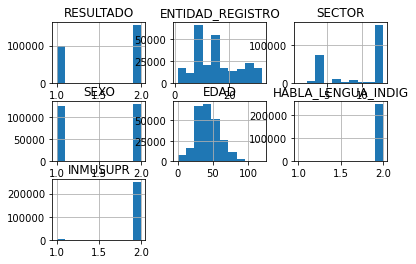

In [23]:
df.hist()

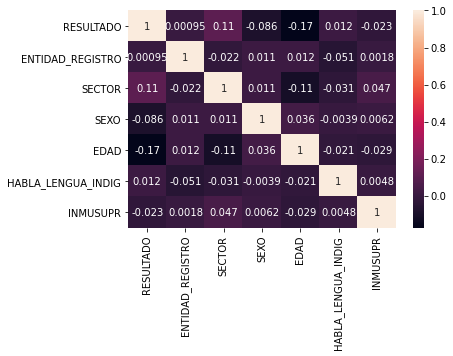

In [24]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [25]:
X = df.drop("RESULTADO", axis = 1)
y = df["RESULTADO"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SVM

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# RNN

In [ ]:
rnn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(58,36), random_state=1)
rnn.fit(X_train, y_train)
y_pred = rnn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Naive Bayes 

In [ ]:
naivBay = GaussianNB()
naivBay.fit(X_train, y_train)
y_pred = naivBay.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))